In [56]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(555)

EXCLUDE = ["par", "llar", "dummy", "lasso"]
def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    
    df["pospercent"] = df.pos / df.total
    
    df.pos = df.pos.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = 100*(df.XRP_price.shift(-1) - df.XRP_price) / df.XRP_price

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','SPY_change','labels','pos','neg','time','dom'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

In [23]:
def get_train_validation_test(df):
    train, test = train_test_split(df, test_size = 0.20, random_state = 1 )
    train, validation = train_test_split(train, test_size = 0.20, random_state = 1 )
    train, validation, test = train.reset_index(drop = True), validation.reset_index(drop = True), test.reset_index(drop = True)
    print("Train: ", train.shape, " Validation: ", validation.shape, "Test: ", test.shape )
    return train, validation, test

def get_and_save_split_data(filename):
    df = read_and_clean_data(filename)
    train, validation, test = get_train_validation_test(df)
    
    if "day" in filename:
        prefix = "day"
    if "hour" in filename:
        prefix = "hour"
    if "minute" in filename:
        prefix = "minute"
    
    train.to_csv("data/"+prefix+"_train.csv", index = False)
    validation.to_csv("data/"+prefix+"_validation.csv", index = False)
    test.to_csv("data/"+prefix+"_test.csv", index = False)
    
    return train, validation, test

## Day

In [24]:
day_train, day_valid, day_test = get_and_save_split_data("data/full_day.csv")

Train:  (33, 6)  Validation:  (9, 6) Test:  (11, 6)


In [25]:
sday = setup(data = day_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 1)
set_config('seed', 555) 

,Description,Value
0,session_id,1
1,Target,change
2,Original Data,"(33, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(23, 5)"


In [26]:
mday = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0458,0.0036,0.0533,-8282.3423,0.0330,1.3772,0.0040
knn,K Neighbors Regressor,0.0479,0.0033,0.0523,-11505.3663,0.0342,1.3649,0.0030
rf,Random Forest Regressor,0.0446,0.0032,0.0518,-12728.2459,0.0336,1.3155,0.0200
dt,Decision Tree Regressor,0.0555,0.0055,0.0667,-17188.8754,0.0331,1.8605,0.0020
lightgbm,Light Gradient Boosting Machine,0.0442,0.0026,0.0482,-18282.6788,0.0383,1.1486,0.1780
dummy,Dummy Regressor,0.0442,0.0026,0.0482,-18282.6793,0.0383,1.1486,0.0020
ada,AdaBoost Regressor,0.0508,0.0038,0.0571,-19188.6288,0.0381,1.6067,0.0070
lasso,Lasso Regression,0.0456,0.0027,0.0491,-19326.0396,0.0393,1.2589,0.0020
en,Elastic Net,0.0465,0.0028,0.0500,-19764.3713,0.0394,1.3186,0.0030
et,Extra Trees Regressor,0.0536,0.0042,0.0607,-20825.6055,0.0314,1.5355,0.0180


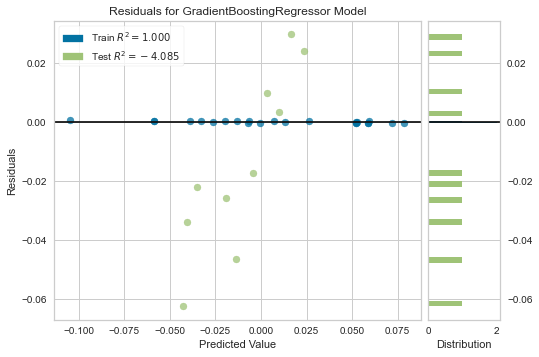

In [27]:
plot_model(mday)

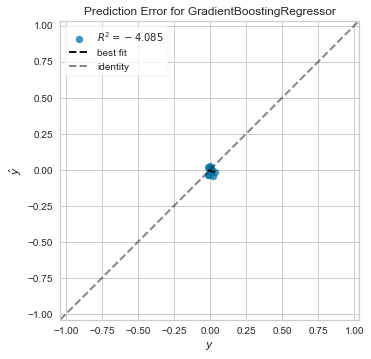

In [28]:
plot_model(mday, plot = 'error')

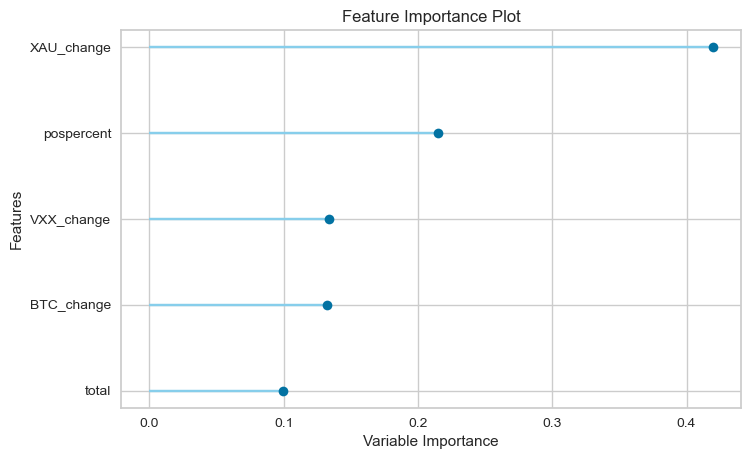

In [29]:
plot_model(mday, plot='feature')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0300,0.0013,0.0355,-1.1582,0.0281,1.8350


<Figure size 1080x504 with 0 Axes>

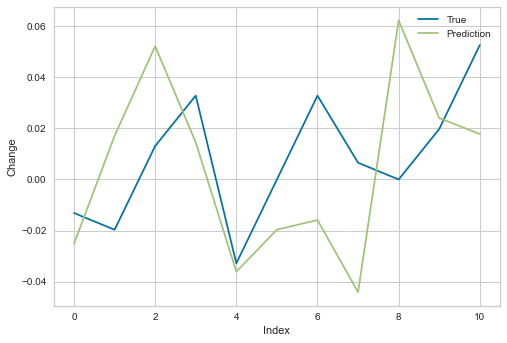

In [30]:
pred = predict_model(mday, data = day_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/day_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/day_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [31]:
plot_model(mday, save = True)
plot_model(mday, plot = 'error', save = True)
plot_model(mday, plot='feature', save = True)
#save_model(mday, "pc_day")

'Feature Importance.png'

## Hour

In [40]:
hour_train, hour_valid, hour_test = get_and_save_split_data("data/full_hour.csv")

Train:  (790, 6)  Validation:  (198, 6) Test:  (247, 6)


In [41]:
shour = setup(data = hour_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 2)
set_config('seed', 555) 

,Description,Value
0,session_id,2
1,Target,change
2,Original Data,"(790, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(552, 5)"


In [42]:
mhour = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.4810,0.4809,0.6864,-0.0146,0.4180,1.0799,0.0020
huber,Huber Regressor,0.4812,0.4797,0.6860,-0.0149,0.4148,1.1401,0.0040
en,Elastic Net,0.4812,0.4811,0.6865,-0.0151,0.4180,1.0804,0.0020
br,Bayesian Ridge,0.4810,0.4813,0.6867,-0.0157,0.4182,1.0745,0.0030
ridge,Ridge Regression,0.4818,0.4808,0.6868,-0.0174,0.4028,1.2093,0.0020
lr,Linear Regression,0.4821,0.4809,0.6869,-0.0180,0.4018,1.2185,0.0020
lar,Least Angle Regression,0.4821,0.4809,0.6869,-0.0180,0.4018,1.2185,0.0020
omp,Orthogonal Matching Pursuit,0.4822,0.4816,0.6872,-0.0185,0.4055,1.1878,0.0020
gbr,Gradient Boosting Regressor,0.5287,0.5281,0.7217,-0.1358,0.3676,2.1260,0.0100
ada,AdaBoost Regressor,0.5416,0.5469,0.7333,-0.1682,0.3631,2.2167,0.0100


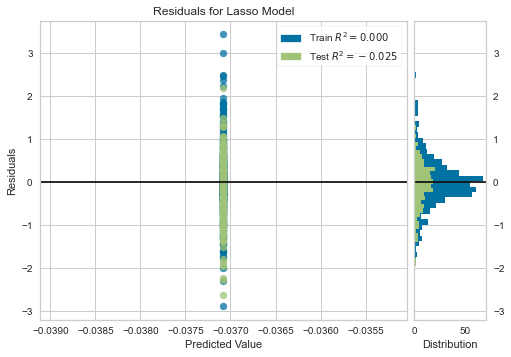

In [43]:
plot_model(mhour)

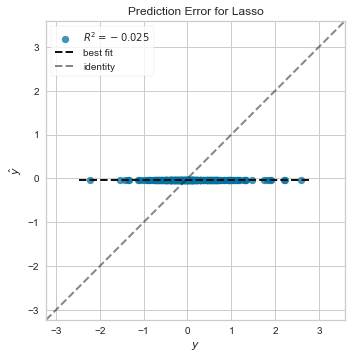

In [44]:
plot_model(mhour, plot = "error")

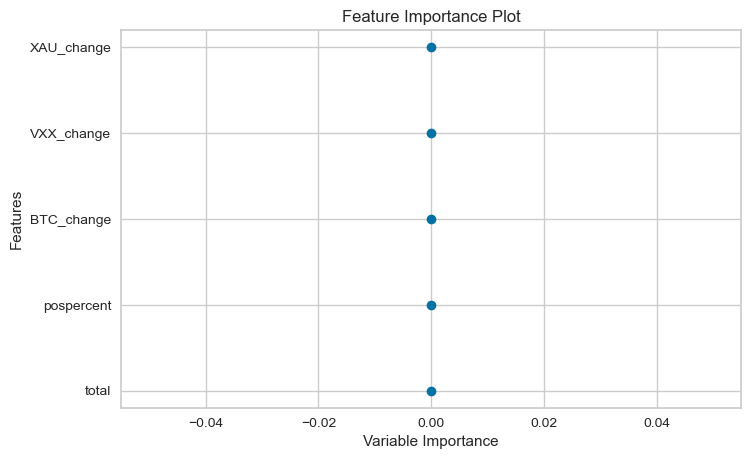

In [45]:
plot_model(mhour, plot = "feature")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.5716,0.6304,0.7940,-0.0178,0.4717,1.0807


<Figure size 1080x504 with 0 Axes>

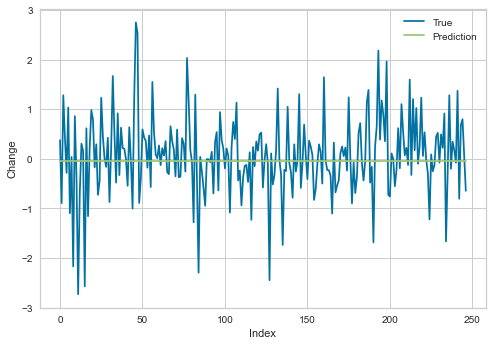

In [46]:
pred = predict_model(mhour, data = hour_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/hour_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/hour_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [47]:
plot_model(mhour, save = True)
plot_model(mhour, plot = "error", save = True)
plot_model(mhour, plot = "feature", save = True)

'Feature Importance.png'

## Minute

In [48]:
minute_train, minute_valid, minute_test = get_and_save_split_data("data/full_minute.csv")

Train:  (5872, 6)  Validation:  (1468, 6) Test:  (1835, 6)


In [57]:
shour = setup(data = minute_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 3)
set_config('seed', 555) 

,Description,Value
0,session_id,3
1,Target,change
2,Original Data,"(5872, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(4110, 5)"


In [58]:
mminute = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.0604,0.0087,0.0931,-0.0044,0.0815,320938881.8011,0.0020
huber,Huber Regressor,0.0604,0.0087,0.0931,-0.0044,0.0815,283744110.3075,0.0060
br,Bayesian Ridge,0.0604,0.0087,0.0931,-0.0045,0.0814,372230701.2315,0.0040
ridge,Ridge Regression,0.0605,0.0087,0.0931,-0.0048,0.0809,429626656.2001,0.0020
lr,Linear Regression,0.0605,0.0087,0.0931,-0.0049,0.0809,431685157.0001,0.0030
lar,Least Angle Regression,0.0605,0.0087,0.0931,-0.0049,0.0809,431683930.3318,0.0020
omp,Orthogonal Matching Pursuit,0.0604,0.0087,0.0931,-0.0055,0.0813,420092441.4539,0.0020
gbr,Gradient Boosting Regressor,0.0620,0.0090,0.0947,-0.0416,0.0793,1877006057.6079,0.0350
lightgbm,Light Gradient Boosting Machine,0.0639,0.0093,0.0961,-0.0730,0.0740,4389931097.7649,0.1930
ada,AdaBoost Regressor,0.0654,0.0097,0.0983,-0.1197,0.0766,2506674282.8816,0.0130


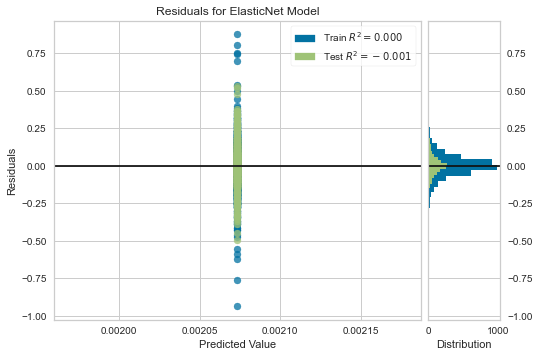

In [59]:
plot_model(mminute)

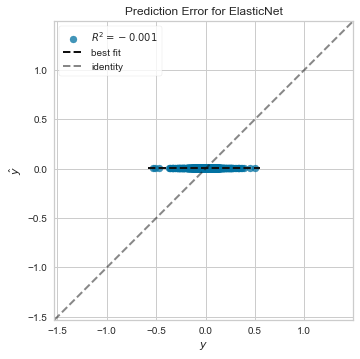

In [60]:
plot_model(mminute, plot = "error")

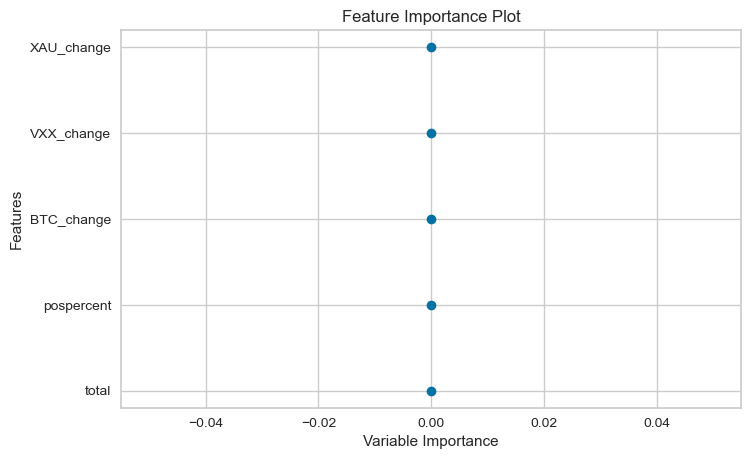

In [61]:
plot_model(mminute, plot = "feature")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.0643,0.0101,0.1003,-0.0003,0.0867,151921890.2525


<Figure size 1080x504 with 0 Axes>

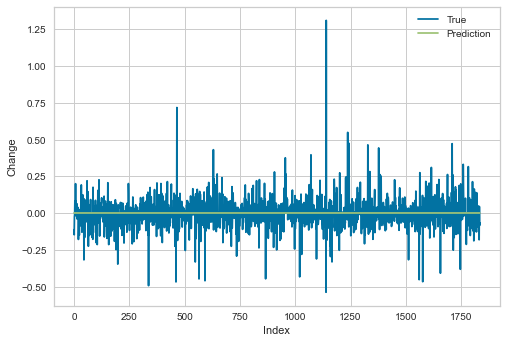

In [62]:
pred = predict_model(mminute, data = minute_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/minute_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/minute_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [63]:
plot_model(mminute, save = True)
plot_model(mminute, plot = "error", save = True)
plot_model(mminute, plot = "feature", save = True)
#save_model(mminute, "pc_minute")

'Feature Importance.png'